In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
db=mysql.connector.connect(host='localhost',
                           username='root',
                           password='akshay#14',
                           database='ecommerce')
cur=db.cursor()


# List all unique cities where customers are located. 

In [2]:
query="""select distinct customer_city from customers"""
cur.execute(query)
data = cur.fetchall()
data

[('franca',),
 ('sao bernardo do campo',),
 ('sao paulo',),
 ('mogi das cruzes',),
 ('campinas',),
 ('jaragua do sul',),
 ('timoteo',),
 ('curitiba',),
 ('belo horizonte',),
 ('montes claros',),
 ('rio de janeiro',),
 ('lencois paulista',),
 ('caxias do sul',),
 ('piracicaba',),
 ('guarulhos',),
 ('pacaja',),
 ('florianopolis',),
 ('aparecida de goiania',),
 ('santo andre',),
 ('goiania',),
 ('cachoeiro de itapemirim',),
 ('sao jose dos campos',),
 ('sao roque',),
 ('camacari',),
 ('resende',),
 ('sumare',),
 ('novo hamburgo',),
 ('sao luis',),
 ('sao jose',),
 ('santa barbara',),
 ('ribeirao preto',),
 ('ituiutaba',),
 ('taquarituba',),
 ('sao jose dos pinhais',),
 ('barrinha',),
 ('parati',),
 ('dourados',),
 ('trindade',),
 ('cascavel',),
 ('fortaleza',),
 ('brasilia',),
 ('pelotas',),
 ('porto alegre',),
 ('salto',),
 ('jundiai',),
 ('cacapava',),
 ('sao vicente',),
 ('uberlandia',),
 ('botelhos',),
 ('sao goncalo',),
 ('araucaria',),
 ('nova iguacu',),
 ('areia branca',),
 ('campo

# Count the number of orders placed in 2017.

In [3]:
query="""select count(order_id) from orders where year(order_purchase_timestamp)=2017"""
cur.execute(query)
data = cur.fetchall()
data

[(315707,)]

# Find the total sales per category.

In [4]:
query="""select products.product_category category, round(sum(payments.payment_value),2) sales
from products join order_items
on products.product_id=order_items.product_id
join payments
on payments.order_id=order_items.order_id
group by category """
cur.execute(query)
data = cur.fetchall()
df=pd.DataFrame(data,columns=["category","sales"])
df

,category,sales
0,perfumery,1013477.32
1,Furniture Decoration,2860352.78
2,telephony,973764.10
3,bed table bath,3425107.34
4,automotive,1704588.66
...,...,...
69,cds music dvds,2398.86
70,La Cuisine,5827.06
71,Fashion Children's Clothing,1571.34
72,PC Gamer,4348.86


# Count the number of customers from each state.

<function matplotlib.pyplot.show(close=None, block=None)>

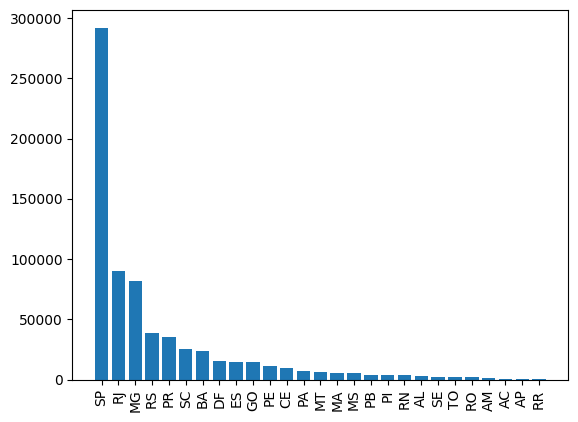

In [5]:
query = """select customer_state ,count(customer_id)
 from customers group by customer_state"""
cur.execute(query)
data = cur.fetchall()
df=pd.DataFrame(data ,columns=["state","customer_count"])
df=df.sort_values(by="customer_count", ascending=False)
plt.bar(df["state"],df["customer_count"])
plt.xticks(rotation=90)
plt.show

# Calculate the number of orders per month in 2018.

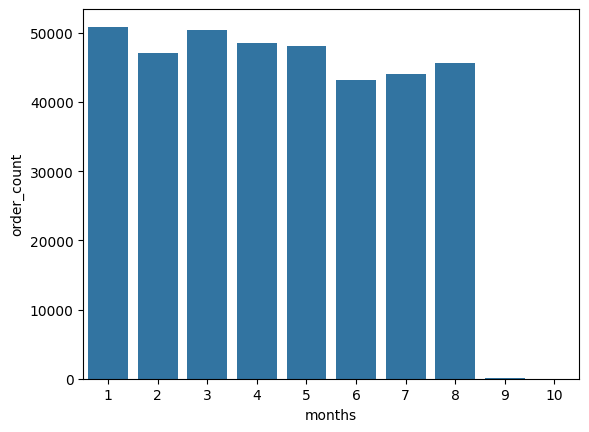

In [6]:
query="""select month(order_purchase_timestamp) months ,count(order_id) order_count
from orders where year (order_purchase_timestamp) =2018
group by months"""
cur.execute(query)
data = cur.fetchall()
df=pd.DataFrame(data, columns=["months","order_count"])
sns.barplot(x=df["months"],y=df["order_count"], data=df)
plt.show()

# Find the average number of products per order, grouped by customer city.


In [7]:
query="""with count_per_order as
(select orders.order_id, orders.customer_id, count(order_items.order_id) as oc
from orders join order_items 
on orders.order_id=order_items.order_id
group by orders.order_id, orders.customer_id)
select customers.customer_city,round(avg(count_per_order.oc),2) average_orders
from customers join count_per_order
on customers.customer_id=count_per_order.customer_id
group by customers.customer_city order by average_orders"""
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data)
df.head(10)

,0,1
0,sao benedito do rio preto,7.00
1,serranopolis,7.00
2,porto calvo,7.00
3,ipupiara,7.00
4,fortim,7.00
5,capela do alto alegre,7.00
6,americo de campos,7.00
7,cairu,7.00
8,sao joao do sobrado,7.00
9,epitaciolandia,7.00


# Calculate the moving average of order values for each customer over their order history.

In [8]:
query="""select customer_id,order_purchase_timestamp,payment,
avg(payment) over(partition by customer_id order by order_purchase_timestamp
rows between 2 preceding and current row) as mov_avg
from
(select orders.customer_id, order_purchase_timestamp,
payments.payment_value as payment from payments join orders 
on payments.order_id=orders.order_id) as a"""
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data)
df

,0,1,2,3
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
1,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
2,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
3,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
4,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
...,...,...,...,...
727197,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.37,18.370001
727198,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.37,18.370001
727199,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.37,18.370001
727200,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.37,18.370001


# Calculate the total revenue generated by each seller, and rank them by revenue.

<function matplotlib.pyplot.show(close=None, block=None)>

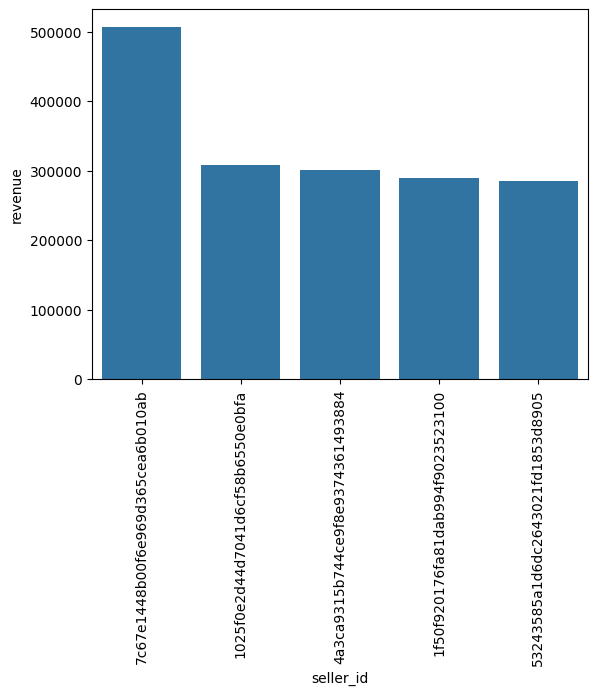

In [12]:
query="""select *, dense_rank() over(order by revenue desc) as rn from
(select order_items.seller_id, sum(payments.payment_value)
revenue from order_items join payments
on order_items.order_id=payments.order_id
group by order_items.seller_id) as a
"""
cur.execute(query)
data= cur.fetchall()
df=pd.DataFrame(data, columns=["seller_id", "revenue","rank"])
df=df.head(5)
sns.barplot(x="seller_id",y="revenue", data=df)
plt.xticks(rotation=90)
plt.show

#  Identify the top 3 customers who spent the most money in each year.

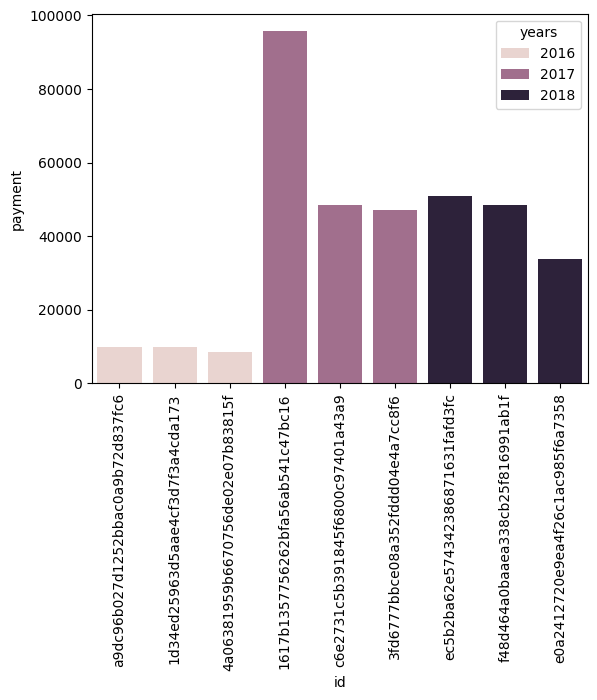

In [11]:
query="""select years, customer_id, payment, d_rank
from
(select year(orders.order_purchase_timestamp) years,
orders.customer_id,
sum(payments.payment_value) payment,
dense_rank() over(partition by year(orders.order_purchase_timestamp)
order by sum(payments.payment_value) desc) d_rank
from orders join payments 
on payments.order_id=orders.order_id
group by year(orders.order_purchase_timestamp),
orders.customer_id) as a
where d_rank<=3 ;"""
cur.execute(query)
data= cur.fetchall()
df=pd.DataFrame(data, columns=["years","id","payment","rank"])
sns.barplot(x="id",y="payment", data=df,hue="years")
plt.xticks(rotation=90)
plt.show()